BMI PCA data not found, training PCA now...
BMI PCA training data saved as: pca_full/binary/train/BMI.csv
BMI PCA test data saved as: pca_full/binary/test/BMI.csv


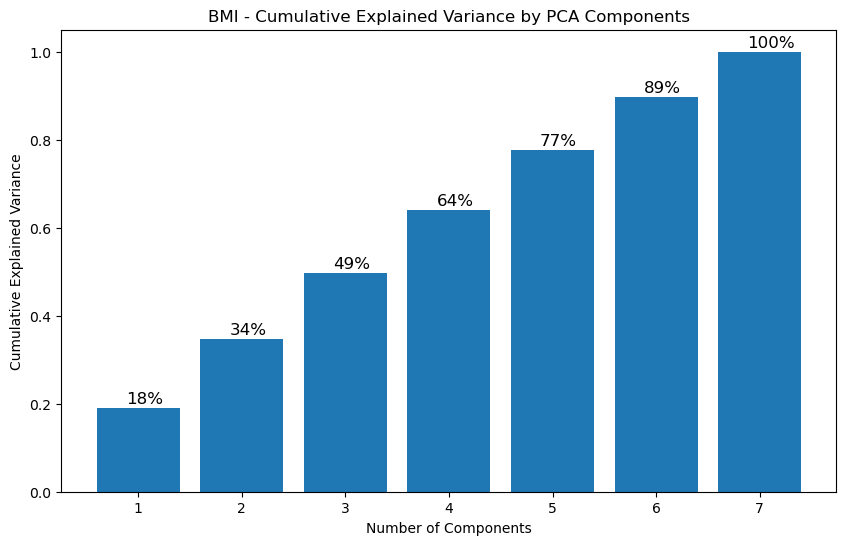

blood_lipids PCA data not found, training PCA now...
blood_lipids PCA training data saved as: pca_full/binary/train/blood_lipids.csv
blood_lipids PCA test data saved as: pca_full/binary/test/blood_lipids.csv


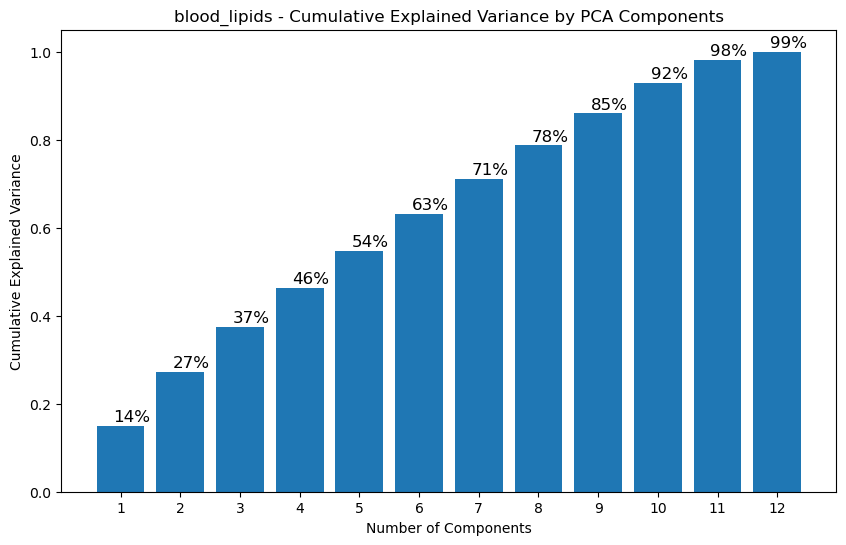

blood_glucose PCA data not found, training PCA now...
blood_glucose PCA training data saved as: pca_full/binary/train/blood_glucose.csv
blood_glucose PCA test data saved as: pca_full/binary/test/blood_glucose.csv


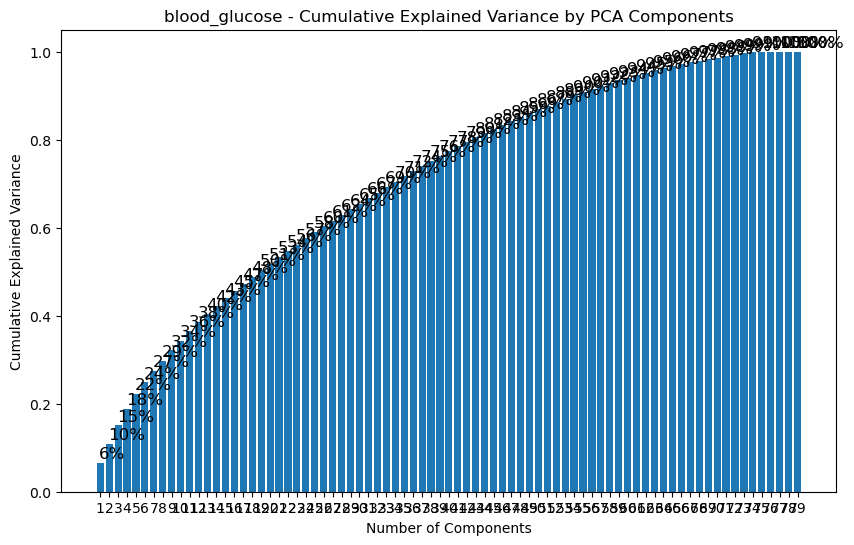

hypertensive PCA data not found, training PCA now...
hypertensive PCA training data saved as: pca_full/binary/train/hypertensive.csv
hypertensive PCA test data saved as: pca_full/binary/test/hypertensive.csv


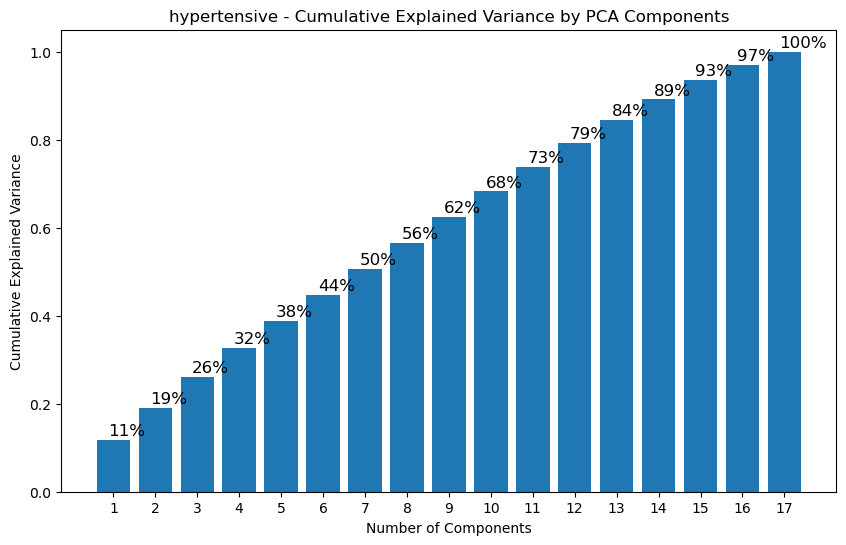

nicotine PCA data not found, training PCA now...
nicotine PCA training data saved as: pca_full/binary/train/nicotine.csv
nicotine PCA test data saved as: pca_full/binary/test/nicotine.csv


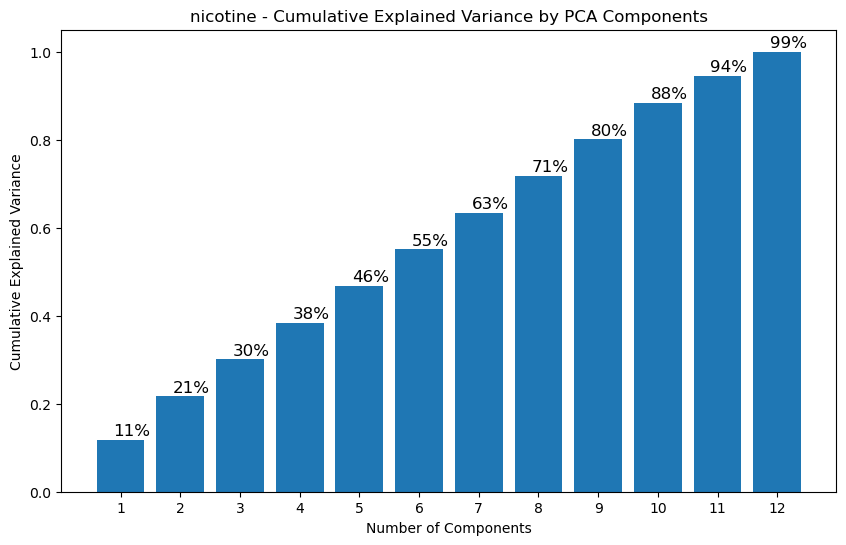

alcohol PCA data not found, training PCA now...
alcohol PCA training data saved as: pca_full/binary/train/alcohol.csv
alcohol PCA test data saved as: pca_full/binary/test/alcohol.csv


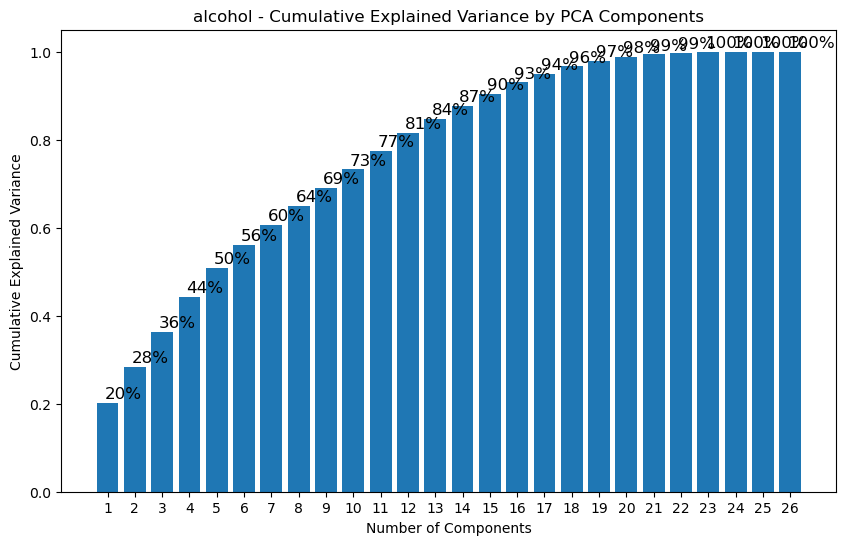

Neural Network feature data not found, training Neural Network now...
Test Accuracy after epoch [1/201]: 0.5803
Test Accuracy after epoch [6/201]: 0.6157
Test Accuracy after epoch [11/201]: 0.6181
Test Accuracy after epoch [16/201]: 0.6251
Test Accuracy after epoch [21/201]: 0.6246
Test Accuracy after epoch [26/201]: 0.6239
Test Accuracy after epoch [31/201]: 0.6270
Test Accuracy after epoch [36/201]: 0.6287
Test Accuracy after epoch [41/201]: 0.6275
Test Accuracy after epoch [46/201]: 0.6263
Test Accuracy after epoch [51/201]: 0.6171
Test Accuracy after epoch [56/201]: 0.6304
Test Accuracy after epoch [61/201]: 0.6297
Test Accuracy after epoch [66/201]: 0.6248
Test Accuracy after epoch [71/201]: 0.6323
Test Accuracy after epoch [76/201]: 0.6306
Test Accuracy after epoch [81/201]: 0.6301
Test Accuracy after epoch [86/201]: 0.6297
Test Accuracy after epoch [91/201]: 0.6306
Test Accuracy after epoch [96/201]: 0.6297
Test Accuracy after epoch [101/201]: 0.6311
Test Accuracy after epoch [1

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

from preprocessing import preprocessing
from pca import pca_load
from pca_all import pca_load_all
from baseline import baseline
from lr import LR
from lr import LR_P
from rf import RF
from nn import nn_load

import statsmodels.api as sm
from sklearn.metrics import accuracy_score

# short code or full code
#code_type = "short"
code_type = "full"

if code_type == "short":
    filename = "main_dataset_final_3"
elif code_type == "full":
    filename = "main_dataset_final_3_full_icd10"
    
#preprocessing(filename)

# binary or continuous
datatype = "binary"
# datatype = "cont"
filename_add = int(code_type == "full")
X = pd.read_csv("data/stroke_data_" + datatype + filename_add*"_full" + ".csv")
X.dropna(inplace=True)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

disease_mapping = {
    #"BMI": ['Z68','E65','E66','E67','E68'], 
    "BMI": ['E65','E66'], 
    "blood_lipids": ['E78'],
    "blood_glucose": ['E10','E11'],
#     "hypertensive": ['I10','I11','I12','I13','I14','I15','I16'],
    "hypertensive": ['I10','I11','I12','I13','I15','I16'],
    "nicotine":['F17','Z72'],
    "alcohol":['F10']
}

# pca vs. baseline
train, test = pca_load(datatype, disease_mapping, X_train, X_test, code_type, pc0_only=True)
# X_train, X_test = pca_load_all(datatype, X_train, X_test)
max_train, max_test = baseline(datatype, disease_mapping, "max", X_train, X_test)
sum_train, sum_test = baseline(datatype, disease_mapping, "sum", X_train, X_test)
nn_train, nn_test = nn_load(datatype, disease_mapping, X_train, X_test, code_type)

print(X_train.shape, X_test.shape)


print(train.shape, test.shape)
print(max_train.shape, max_test.shape)
print(sum_train.shape, sum_test.shape)
print(nn_train.shape,nn_test.shape)

# Binary

In [5]:
# # orginal data with all covariates

# X = pd.read_csv("data/stroke_data_binary.csv")
# X.dropna(inplace=True)
# #X= X[X['race'] != 'Black or African American']
# or_train, or_test = train_test_split(X, test_size=0.2, random_state=42)
# print("By Logistic Regression, result for all original predicitors:")
# LR(or_train,or_test,tolerance = 1e-4,iter = 6000, seed = 43)

# param_grid = {
#     'n_estimators': [100],  
#     'max_features': [0.2, 0.4],  
#     'max_depth': [10, 20],  
#     'min_samples_split': [5, 10],  
#     'min_samples_leaf': [2, 4],  
#     'bootstrap': [True, False]  
# }
# print("Result for Random Forest, result for all original predicitors:")
# RF(or_train,or_test,params=param_grid)

In [6]:
# Logistic Regression
# We select several comorbidities and demographics as the predictors.

## baseline: orginal data with the max_aggregation covariates
print("By Logistic Regression, result for sum baseline:")
LR(sum_train,sum_test,tolerance = 1e-4,iter = 4000, seed = 43)
print("By Logistic Regression, result for max baseline:")
LR(max_train,max_test,tolerance = 1e-4,iter = 4000, seed = 43)
## selected PCA covariates.
print("By Logistic Regression, result for PCA:")
LR(train,test,tolerance = 1e-4,iter = 4000, seed = 43)
print("By Logistic Regression, result for NN:")
LR(nn_train,nn_test,tolerance = 1e-4,iter = 4000, seed = 43)

By Logistic Regression, result for sum baseline:
[[ 0.13912568  0.09249018  0.28375744  0.02134602  0.02131209  0.08809664
  -0.00500543  0.79560632  0.24107553 -0.04046569 -0.94362568  0.00441358
   0.0481769  -0.1620558   0.94545914 -0.41516662 -0.03717494 -0.27847129]]
Accuracy: 0.6405008427642668
Recall: 0.7324144486692015
By Logistic Regression, result for max baseline:
[[ 0.19436645  0.17615508  0.61403935  0.12734774 -0.00751074  0.17349661
  -0.00579992  0.78736604  0.22815578 -0.09692755 -0.95015325 -0.04066974
   0.00911076 -0.18604659  0.79943649 -0.42206424  0.00853291 -0.23141755]]
Accuracy: 0.6402600529737539
Recall: 0.7623574144486692
By Logistic Regression, result for PCA:
[[ 0.00673835  0.04499987  0.14199506 -0.01564083 -0.04995507  0.02613172
  -0.0028853   0.81797053  0.25676842 -0.01859717 -0.92772859  0.03953551
   0.08887769 -0.07707384  0.79189641 -0.39195276  0.05337343 -0.24783004]]
Accuracy: 0.6354442571634963
Recall: 0.7119771863117871
By Logistic Regression

()

In [7]:
# Random Forest
# We select several comorbidities and demographics as the predictors.
# Since the number of predicitors is not large, so here 'max_features' is not small.
param_grid = {
    'n_estimators': [100,200,300],  
    'max_features': [0.8, 0.9, 1],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True]  
}

## baseline: orginal data with the max_aggregation covariates
print("By Random Forest, result for sum baseline:")
RF(sum_train,sum_test,params=param_grid)
print("By Random Forest, result for max baseline:")
RF(max_train,max_test,params=param_grid)
## selected PCA covariates.
print("By Random Forest, result for PCA:")
RF(train,test,params=param_grid)
print("By Random Forest, result for NN:")
RF(nn_train,nn_test,params=param_grid)


By Random Forest, result for sum baseline:
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


Best params: {'bootstrap': True, 'max_depth': None, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.7286299060919817
Recall: 0.7333650190114068
By Random Forest, result for max baseline:
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params: {'bootstrap': True, 'max_depth': None, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.7158680471947989
Recall: 0.7210076045627376
By Random Forest, result for PCA:
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params: {'bootstrap': True, 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.7404286058271129
Recall: 0.7385931558935361
By Random Forest, result for NN:
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params: {'bootstrap': True, 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples